# Project 1: Digit Classification with KNN and Naive Bayes

In this project, you'll implement your own image recognition system for classifying digits. Read through the code and the instructions carefully and add your own code where indicated. Each problem can be addressed succinctly with the included packages -- please don't add any more. Grading will be based on writing clean, commented code, along with a few short answers.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but <b> please prepare your own write-up (with your own code). </b>

If you're interested, check out these links related to digit recognition:

* Yann Lecun's MNIST benchmarks: http://yann.lecun.com/exdb/mnist/
* Stanford Streetview research and data: http://ufldl.stanford.edu/housenumbers/

Finally, if you'd like to get started with Tensorflow, you can read through this tutorial: https://www.tensorflow.org/tutorials/keras/basic_classification. It uses a dataset called "fashion_mnist", which is identical in structure to the original digit mnist, but uses images of clothing rather than images of digits. The number of training examples and number of labels is the same. In fact, you can simply replace the code that loads "fashion_mnist" with "mnist" and everything should work fine.

In [64]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# Import a bunch of libraries.
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_openml
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import r2_score

# Set the randomizer seed so results are the same each time.
np.random.seed(0)

In [65]:
import sklearn
sklearn.__version__

'0.22.1'

Load the data. Notice that the data gets partitioned into training, development, and test sets. Also, a small subset of the training data called mini_train_data and mini_train_labels gets defined, which you should use in all the experiments below, unless otherwise noted.

In [3]:
# Load the digit data from https://www.openml.org/d/554 or from default local location '~/scikit_learn_data/...'
X, Y = fetch_openml(name='mnist_784', return_X_y=True, cache=False)


# Rescale grayscale values to [0,1].
X = X / 255.0

# Shuffle the input: create a random permutation of the integers between 0 and the number of data points and apply this
# permutation to X and Y.
# NOTE: Each time you run this cell, you'll re-shuffle the data, resulting in a different ordering.
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]

print('data shape: ', X.shape)
print('label shape:', Y.shape)

# Set some variables to hold test, dev, and training data.
test_data, test_labels = X[61000:], Y[61000:]
dev_data, dev_labels = X[60000:61000], Y[60000:61000]
train_data, train_labels = X[:60000], Y[:60000]
mini_train_data, mini_train_labels = X[:1000], Y[:1000]

data shape:  (70000, 784)
label shape: (70000,)


### Part 1:

Show a 10x10 grid that visualizes 10 examples of each digit.

Notes:
* You can use `plt.rc()` for setting the colormap, for example to black and white.
* You can use `plt.subplot()` for creating subplots.
* You can use `plt.imshow()` for rendering a matrix.
* You can use `np.array.reshape()` for reshaping a 1D feature vector into a 2D matrix (for rendering).

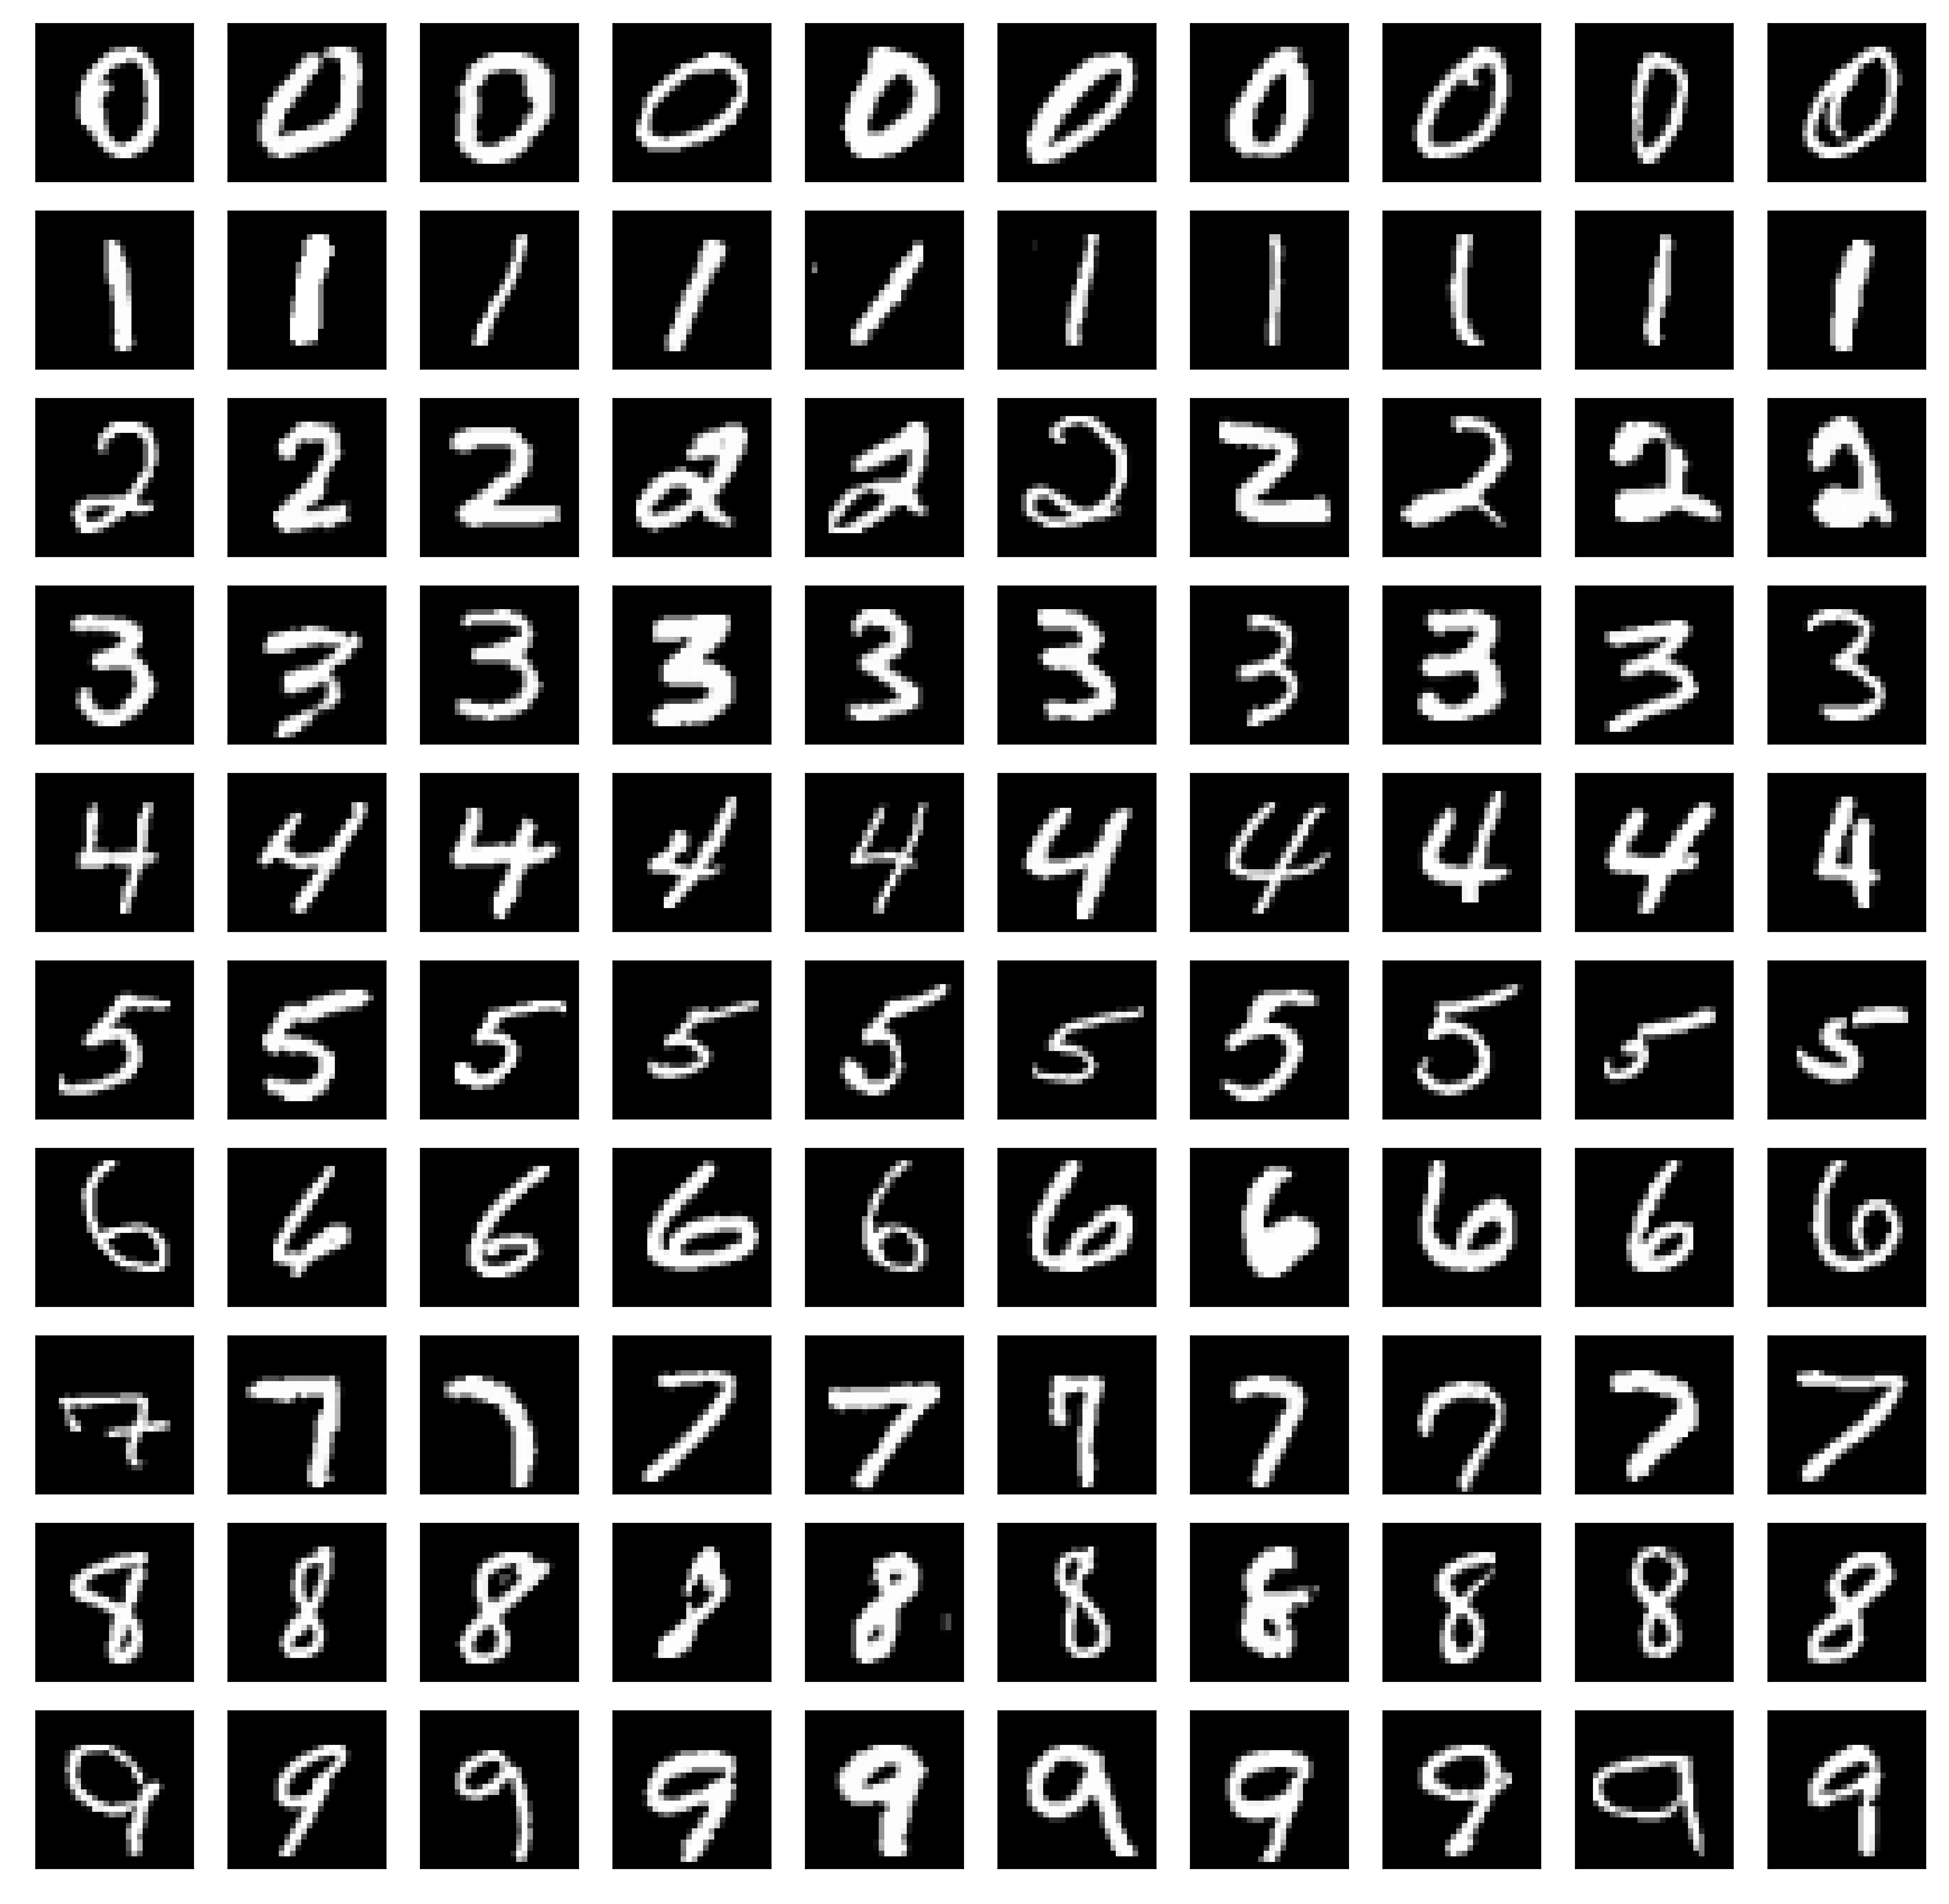

In [104]:
def P1(num_examples=10):

### STUDENT START ###
    # Creating a new figure
    plt.figure(figsize=(len(np.unique(Y)), num_examples), dpi=X.shape[1])
    plt.rc('image', cmap='gray')
    
    # Loop through each unique digit label
    for digit in np.unique(Y):
        # Grab num_examples (10 in this case) examples of each digit
        digit_examples = X[Y == digit][:num_examples]
        # Loop through each example for each digit
        for example in range(len(digit_examples)):
            # Calculating index for a position starting with 1 at top-left
            # "(int(digit) * num_examples)" gets index of previous subplot before new digit
            # "+ example + 1" -> adding value of which number example we are on + 1 since it is 1-indexed
            index = (int(digit) * num_examples) + example + 1
            # Creating a subplot with len(np.unique(Y)) rows, num_examples columns, and index position on grid
            plt.subplot(len(np.unique(Y)), num_examples, index)
            
            # Reshaping digit pixels to 28 x 28 square matrix
            square_dims = int(np.sqrt(X.shape[1]))
            d = digit_examples[example].reshape((square_dims,square_dims))
            
            # Hiding axes
            current_axes = plt.gca() 
            current_axes.get_xaxis().set_ticks([])
            current_axes.get_yaxis().set_ticks([])
            
            # Plotting an example of the digit
            plt.imshow(d)
### STUDENT END ###

P1(10)

### Part 2:

Produce k-Nearest Neighbors models with k $\in$ [1,3,5,7,9].  Evaluate and show the accuracy of each model. For the 1-Nearest Neighbor model, additionally show the precision, recall, and F1 for each label. Which digit is the most difficult for the 1-Nearest Neighbor model to recognize?

Notes:
* Train on the mini train set.
* Evaluate performance on the dev set.
* You can use `KNeighborsClassifier` to produce a k-nearest neighbor model.
* You can use `classification_report` to get precision, recall, and F1 results.

In [56]:
def P2(k_values):

### STUDENT START ###
    # Loop through each k_value
    for k in k_values:
        # Create a new KNeighborsClassifier and set the parameter of 'n_neighbors' equal to each k
        model = KNeighborsClassifier(n_neighbors=k)
        # Train the model on the mini train set
        model.fit(mini_train_data, mini_train_labels)
        # Make predictions using the dev set
        predictions = model.predict(dev_data)
        
        # Evaluate the performance on the dev set but calculating accuracy
        print('k = {0}, Accuracy: {1}'.format(k, model.score(dev_data, dev_labels)))
        
        # For the 1-Nearest Neighbor model, show precision, recall, and F1 using classification_report
        if (k == 1):
            print()
            print(classification_report(dev_labels, predictions))
### STUDENT END ###

k_values = [1, 3, 5, 7, 9]
P2(k_values)

k = 1, Accuracy: 0.884

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       106
           1       0.89      0.98      0.93       118
           2       0.90      0.79      0.84       106
           3       0.93      0.87      0.90        97
           4       0.91      0.85      0.88        92
           5       0.86      0.88      0.87        88
           6       0.92      0.92      0.92       102
           7       0.85      0.94      0.89       102
           8       0.83      0.77      0.80        94
           9       0.80      0.86      0.83        95

    accuracy                           0.88      1000
   macro avg       0.88      0.88      0.88      1000
weighted avg       0.89      0.88      0.88      1000

k = 3, Accuracy: 0.876
k = 5, Accuracy: 0.882
k = 7, Accuracy: 0.877
k = 9, Accuracy: 0.875


ANSWER: In order to identify which digit was the most difficult for the 1-Nearest Neighbor model to recognize, we must first understand the differences between precision, recall, and f1-score. Precision is the ratio of correctly predicting positive observations over the total predicted positive observations $(TP/TP + FP)$. Recall is the ratio of correctly predicting positive over all actual positive labels $(TP/TP + FN)$. Finally, f1-score is just the weighted average of both precision and recall. 

Now, from the classification report above, it appears that the digit 9 has the lowest precision value, with the digit 8 coming in second. Looking at recall, the digit 8 appears to have the lowest value. So, even though the digit 8 is more precise than the digit 9, it is still less accurate when correctly predicting positive over all actual positive labels. Finally, the f1-score, which takes into account both precision and recall, also clearly indicates that the digit **8** has the lowest score and therefore is the most difficult digit for the 1-Nearest Neighbor model to recognize.

### Part 3:

Produce 1-Nearest Neighbor models using training data of various sizes.  Evaluate and show the performance of each model.  Additionally, show the time needed to measure the performance of each model.

Notes:
* Train on subsets of the train set.  For each subset, take just the first part of the train set without re-ordering.
* Evaluate on the dev set.
* You can use `KNeighborsClassifier` to produce a k-nearest neighbor model.
* You can use `time.time()` to measure elapsed time of operations.

In [107]:
def P3(train_sizes, accuracies):

### STUDENT START ###
    # Loop through each size in the train_sizes list
    for size in train_sizes:
        # Start the timer
        start_time = time.time()
        # Grab just the first 'size' amount of training data from the train set
        tdata = train_data[:size]
        # Grab just the first 'size' amount of training labels from the train set
        tlabels = train_labels[:size]
        
        # Create a new 1-Nearest Neighbor model
        model = KNeighborsClassifier(n_neighbors=1)
        # Train on the portion of the train set as defined above
        model.fit(tdata, tlabels)
        
        # Evaluate performance on the dev set to get accuracy
        accuracy = model.score(dev_data, dev_labels)
        accuracies.append(accuracy)
        
        # Get the elapsed time
        elapsed_time = time.time() - start_time
        
        print('Training size: {0}, Elapsed Time: {1}, Accuracy: {2}'.format(size, elapsed_time, accuracy))

### STUDENT END ###

train_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25600]
accuracies = []
P3(train_sizes, accuracies)

Training size: 100, Elapsed Time: 0.15774011611938477, Accuracy: 0.702
Training size: 200, Elapsed Time: 0.3124568462371826, Accuracy: 0.791
Training size: 400, Elapsed Time: 0.5124599933624268, Accuracy: 0.811
Training size: 800, Elapsed Time: 1.0962750911712646, Accuracy: 0.866
Training size: 1600, Elapsed Time: 1.8893470764160156, Accuracy: 0.905
Training size: 3200, Elapsed Time: 3.689460039138794, Accuracy: 0.927
Training size: 6400, Elapsed Time: 7.974632024765015, Accuracy: 0.939
Training size: 12800, Elapsed Time: 15.657690048217773, Accuracy: 0.952
Training size: 25600, Elapsed Time: 35.174575090408325, Accuracy: 0.963


### Part 4:

Produce a linear regression model that predicts accuracy of a 1-Nearest Neighbor model given training set size. Show $R^2$ of the linear regression model.  Show the accuracies predicted for training set sizes 60000, 120000, and 1000000.  Show a lineplot of actual accuracies and predicted accuracies vs. training set size over the range of training set sizes in the training data.  What's wrong with using linear regression here?

Apply a transformation to the predictor features and a transformation to the outcome that make the predictions more reasonable.  Show $R^2$ of the improved linear regression model.  Show the accuracies predicted for training set sizes 60000, 120000, and 1000000.  Show a lineplot of actual accuracies and predicted accuracies vs. training set size over the range of training set sizes in the training data - be sure to display accuracies and training set sizes in appropriate units.

Notes:
* Train the linear regression models on all of the (transformed) accuracies estimated in Problem 3.
* Evaluate the linear regression models on all of the (transformed) accuracies estimated in Problem 3.
* You can use `LinearRegression` to produce a linear regression model.
* Remember that the sklearn `fit()` functions take an input matrix X and output vector Y. So, each input example in X is a vector, even if it contains only a single value.
* Hint re: predictor feature transform: Accuracy increases with training set size logarithmically.
* Hint re: outcome transform: When y is a number in range 0 to 1, then odds(y)=y/(1-y) is a number in range 0 to infinity.

Blue - actual accuracy, Red - predicted accuracy

---No transformation (original X and y)---
Size: 60000, Accuracy: 1.2361731707874237
Size: 120000, Accuracy: 1.637428053637104
Size: 1000000, Accuracy: 7.522499668765751

R-square: 0.4177006634161019


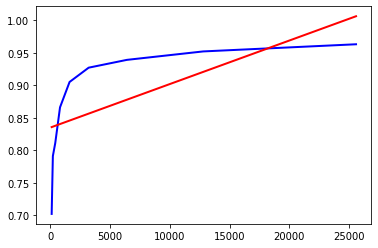

---Log transformed X and original y---
Size: 60000, Accuracy: 1.0335879166434623
Size: 120000, Accuracy: 1.0643212499767958
Size: 1000000, Accuracy: 1.1583312493537086

R-square: 0.9068304252436642


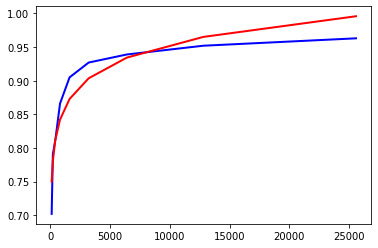

---Original X and log odds transformed y---
Size: 60000, Accuracy: 0.9980193815810603
Size: 120000, Accuracy: 0.9999780820305084
Size: 1000000, Accuracy: 1.0

R-square: 0.6163460585597078


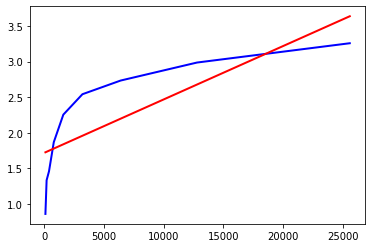

---Log transformed X and log odds transformed y---
Size: 60000, Accuracy: 0.9757526385894685
Size: 120000, Accuracy: 0.9818668246560978
Size: 1000000, Accuracy: 0.9926057178833572

R-square: 0.9897378265316935


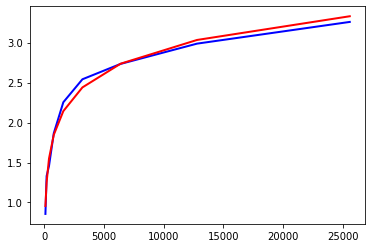

In [182]:
def P4():

### STUDENT START ###
    # Create an ndarray with the new training set sizes
    new_sizes = np.array([60000, 120000, 1000000]).reshape(-1, 1)
    
    ## No transformation (original X and y) ##
    X = np.array(train_sizes).reshape(-1, 1)
    y = np.array(accuracies).reshape(-1, 1)
    
    print("Blue - actual accuracy, Red - predicted accuracy")
    print()
    
    # Create a linear regression model and train using the original train_sizes and accuracies from part 3
    lr_model = LinearRegression()
    lr_model.fit(X,y)
    
    print('---No transformation (original X and y)---')
    
    # Show accuracies predicted for new training set sizes
    for size in range(new_sizes.shape[0]):
        print('Size: {0}, Accuracy: {1}'.format(new_sizes[size].item(), lr_model.predict(new_sizes[size][:,np.newaxis]).item()))
    
    # Predict on the original training sizes to get accuracies
    accuracies_Xy_pred = lr_model.predict(X)
    
    # Calculate R-square between original and predicted accuracies
    print()
    print('R-square: {0}'.format(r2_score(y, accuracies_Xy_pred)))
    
    # Plot actual and predicted accuracies vs. training set sizes
    plt.plot(X, y, color='blue', linewidth=2)
    plt.plot(X, accuracies_Xy_pred, color='red', linewidth=2)
    plt.show()
    
    ################################################################################################################
    
    ## Log transformed X and original y ##
    logX = np.log(X)
    # Train the model using the log tranformation of X
    lr_model.fit(logX, y)
    
    print('---Log transformed X and original y---')
    
    # Show accuracies predicted for new training set sizes
    for size in range(new_sizes.shape[0]):
        print('Size: {0}, Accuracy: {1}'.format(new_sizes[size].item(), lr_model.predict(np.log(new_sizes[size][:,np.newaxis])).item()))

    # Predict on the log transformed training sizes to get accuracies
    accuracies_logXy_pred = lr_model.predict(logX)
    
    # Calculate R-square between original and predicted accuracies
    print()
    print('R-square: {0}'.format(r2_score(y, accuracies_logXy_pred)))
    
    # Plot actual and predicted accuracies vs. training set sizes
    plt.plot(X, y, color='blue', linewidth=2)
    plt.plot(X, accuracies_logXy_pred, color='red', linewidth=2)
    plt.show()
    
    ################################################################################################################
    
    ## Original X and log odds transformed y ##
    logOdds_y = np.log(y / (1 - y))
    # Train the model using the original X and log odds y
    lr_model.fit(X, logOdds_y)
    
    print('---Original X and log odds transformed y---')
    
    # Show accuracies predicted for new training set sizes
    for size in range(new_sizes.shape[0]):
        predicted_new_sizes = lr_model.predict(new_sizes[size][:,np.newaxis]).item()
        accuracy_new_sizes = np.exp(predicted_new_sizes) / (np.exp(predicted_new_sizes) + 1)
        print('Size: {0}, Accuracy: {1}'.format(new_sizes[size].item(), accuracy_new_sizes))

    # Predict on the original X
    logOdds_y_pred = lr_model.predict(X)

    # Calculate R-square between original and predicted log odds
    print()
    print('R-square: {0}'.format(r2_score(logOdds_y, logOdds_y_pred)))
    
    # Plot actual and predicted log odds vs. training set sizes
    plt.plot(X, logOdds_y, color='blue', linewidth=2)
    plt.plot(X, logOdds_y_pred, color='red', linewidth=2)
    plt.show()
    
    ################################################################################################################
    
    ## Log transformed X and log odds transformed y ##
    
    # Train the model using logX and log odds y
    lr_model.fit(logX, logOdds_y)
    
    print('---Log transformed X and log odds transformed y---')
    
    # Show accuracies predicted for new training set sizes
    for size in range(new_sizes.shape[0]):
        predicted_new_sizes = lr_model.predict(np.log(new_sizes[size][:,np.newaxis])).item()
        accuracy_new_sizes = np.exp(predicted_new_sizes) / (np.exp(predicted_new_sizes) + 1)
        print('Size: {0}, Accuracy: {1}'.format(new_sizes[size].item(), accuracy_new_sizes))
    
    # Predict on the log transformed X
    logOdds_y_preds = lr_model.predict(logX)

    # Calculate R-square between original and predicted log odds
    print()
    print('R-square: {0}'.format(r2_score(logOdds_y, logOdds_y_preds)))
    
    # Plot actual and predicted log odds vs. training set sizes
    plt.plot(X, logOdds_y, color='blue', linewidth=2)
    plt.plot(X, logOdds_y_preds, color='red', linewidth=2)
    plt.show()
### STUDENT END ###

P4()

ANSWER: The reason why using linear regression would be considered wrong here is that it tries to measure the linear relationship between training sizes and accuracies and it fails to consider the proper bounds of accuracy values. Specifically, we note that some of our predicted accuracy values go above 1 for bigger training sizes, when accuracy itself is measured between 0 and 1. Since we are measuring a linear relationship, the model does not know that there is a limit at 1. If the slope is positive, we say that y increases as x increases, and as training sizes near 1,000,000, the model predicts higher and higher values for accuracy. Our goal is to predict what is considered realistic values for accuracy, yet we are unable to do so without the application of transformations to help strictly limit the bounds.

### Part 5:

Produce a 1-Nearest Neighbor model and show the confusion matrix. Which pair of digits does the model confuse most often? Show the images of these most often confused digits.

Notes:
- Train on the mini train set.
- Evaluate performance on the dev set.
- You can use `confusion_matrix()` to produce a confusion matrix.

[[101   0   1   0   0   0   1   1   2   0]
 [  0 116   1   0   0   0   0   0   1   0]
 [  1   4  84   2   2   0   2   4   6   1]
 [  0   2   0  84   0   6   0   2   3   0]
 [  0   0   1   0  78   0   0   2   0  11]
 [  2   0   0   1   1  77   5   0   2   0]
 [  1   2   1   0   1   2  94   0   1   0]
 [  0   1   1   0   0   0   0  96   0   4]
 [  1   5   4   3   1   3   0   1  72   4]
 [  0   1   0   0   3   2   0   7   0  82]]

The pair of digits that the model confuses most often is 4 and 9 in 11 cases.


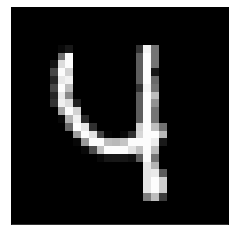

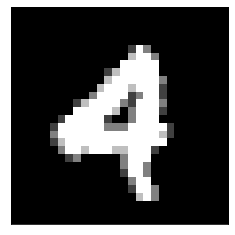

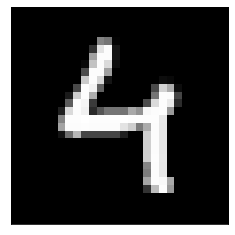

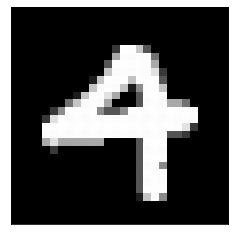

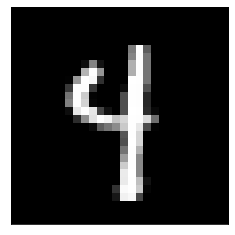

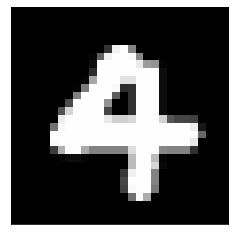

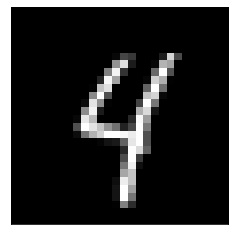

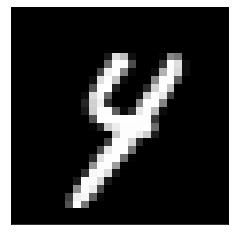

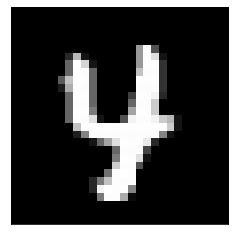

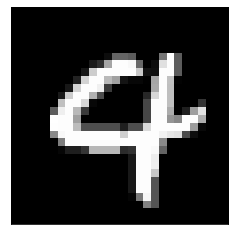

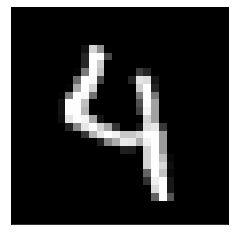

In [181]:
def P5():

### STUDENT START ###
    # Create a 1-Nearest Neighbor model, train using mini_train_data and mini_train_labels, and predict using dev_data
    model = KNeighborsClassifier(n_neighbors=1)
    model.fit(mini_train_data, mini_train_labels)
    predictions = model.predict(dev_data)
    
    # Create the confusion matrix using dev_labels, the predictions made, and unique digit labels
    confusionMatrix = confusion_matrix(dev_labels, predictions, labels=np.unique(dev_labels))
    print(confusionMatrix)
    print()
    
    # Fill in the diagonal of the matrix with all 0s
    np.fill_diagonal(confusionMatrix, 0) 
    
    # Find the maximum value of the matrix
    maxConfusion = confusionMatrix.max()
    
    # Loop through each row
    for row in range(confusionMatrix.shape[0]):
        # Loop through each column
        for col in range(confusionMatrix.shape[1]):
            # Check if the value at this matrix position matches the maxConfusion value
            if confusionMatrix[row][col] == maxConfusion:
                print('The pair of digits that the model confuses most often is %d and %d in %d cases.' % (row, col, maxConfusion))
                break
        else:
            continue
        break
        
    # Plot the 11 cases where '4' was confused with '9'
    for digit in range(predictions.shape[0]):
        if ((predictions[digit] != dev_labels[digit]) and predictions[digit] == '9' and dev_labels[digit] == '4'):
            plt.imshow(dev_data[digit].reshape(28,28), cmap='gray')
            
            # Hiding axes
            current_axes = plt.gca() 
            current_axes.get_xaxis().set_ticks([])
            current_axes.get_yaxis().set_ticks([])
            
            plt.show()
### STUDENT END ###

P5()

ANSWER: The model confuses the digits **4** and **9** the most.

### Part 6:

A common image processing technique is to smooth an image by blurring. The idea is that the value of a particular pixel is estimated as the weighted combination of the original value and the values around it. Typically, the blurring is Gaussian, i.e., the weight of a pixel's influence is determined by a Gaussian function over the distance to the relevant pixel.

Implement a simplified Gaussian blur filter by just using the 8 neighboring pixels like this: the smoothed value of a pixel is a weighted combination of the original value and the 8 neighboring values.

Pick a weight, then produce and evaluate four 1-Nearest Neighbor models by applying your blur filter in these ways:
- Do not use the filter
- Filter the training data but not the dev data
- Filter the dev data but not the training data
- Filter both training data and dev data

Show the accuracies of the four models evaluated as described.  Try to pick a weight that makes one model's accuracy at least 0.9.

Notes:
* Train on the (filtered) mini train set.
* Evaluate performance on the (filtered) dev set.
* There are other Guassian blur filters available, for example in `scipy.ndimage.filters`. You are welcome to experiment with those, but you are likely to get the best results with the simplified version described above.

In [112]:
# Helper function to plot digit images given number of examples to show, list of digit values, data set, and labels
def plotImages(num_examples, digits, X, Y):
    # Creating a new figure and setting the resolution to 784 pixels
    plt.figure(figsize=(num_examples, len(digits)), dpi=X.shape[1])
    plt.rc('image', cmap='gray')
    
    # Loop through each unique digit label
    for i in range(len(digits)):
        # Grab 'num_examples' number of examples of each digit
        digit_examples = X[Y == str(digits[i])][:num_examples]
        # Loop through each example for each digit
        for example in range(len(digit_examples)):
            # Calculating index for a position starting with 1 at top-left
            # "(i * num_examples)" gets index of previous subplot before new digit
            # "+ example + 1" -> adding value of which number example we are on + 1 since it is 1-indexed
            index = (i * num_examples) + example + 1
            # Creating a subplot with len(digits) rows, num_examples columns, and index position on grid
            plt.subplot(len(digits), num_examples, index)

            # Reshaping digit pixels to 28 x 28 square matrix
            square_dims = int(np.sqrt(X.shape[1]))
            d = digit_examples[example].reshape((square_dims,square_dims))
            
            # Hiding axes
            current_axes = plt.gca() 
            current_axes.get_xaxis().set_ticks([])
            current_axes.get_yaxis().set_ticks([])
            
            # Plotting an example of the digit
            plt.imshow(d)

Do not use filter
Accuracy: 0.884

Filter the training data but not the dev data
Accuracy: 0.907

Filter the dev data but not the training data
Accuracy: 0.868

Filter both training data and dev data
Accuracy: 0.905



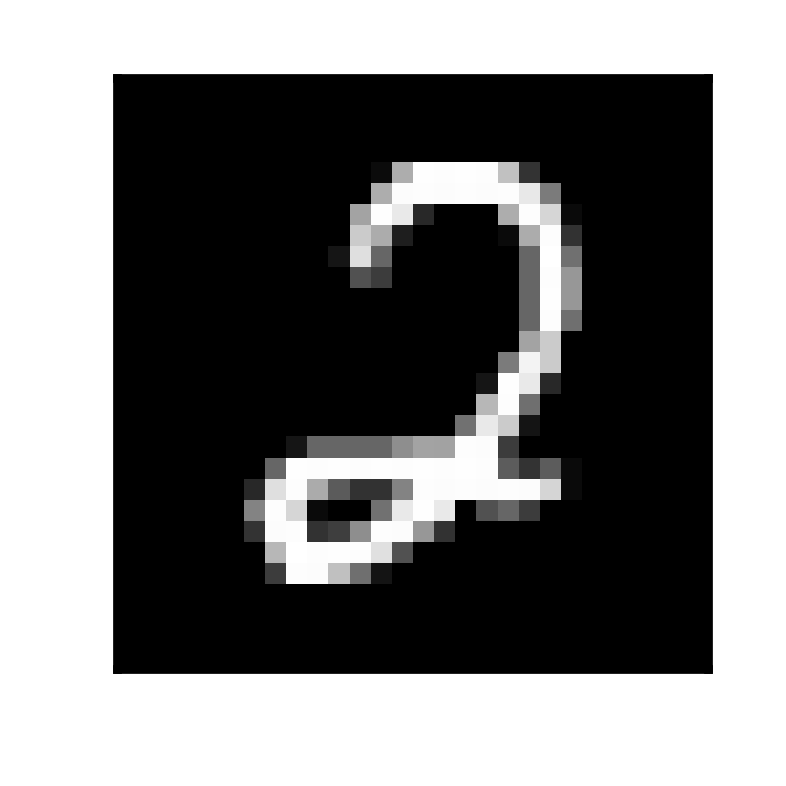

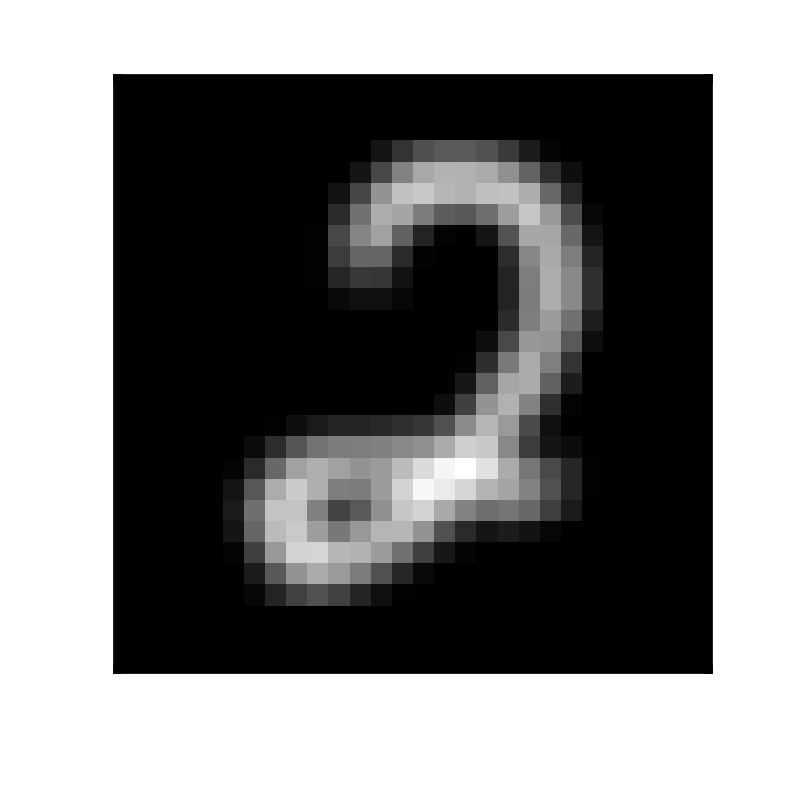

In [170]:
# Return array of current pixel and 8 neighbors
def getNeighbors(row, col):
    # Dictionary of current and 8 neighboring pixels
    neighbors = {
        'topLeft': [row - 1, col - 1],
        'topMiddle': [row - 1, col],
        'topRight': [row - 1, col + 1],
        'middleLeft': [row, col - 1],
        'current': [row, col],
        'middleRight': [row, col + 1],
        'bottomLeft': [row + 1, col - 1],
        'bottomMiddle': [row + 1, col],
        'bottomRight': [row + 1, col + 1]
    }
    
    filtered_neighbors = []
    
    # Check if position is within bounds and include into the filtered_neighbors list
    for key, value in neighbors.items():
        if value[0] >= 0 and value[0] <= 29:
            if value[1] >= 0 and value[1] <= 29:
                filtered_neighbors.append([value[0], value[1]])
                
    return filtered_neighbors

# Get the weighted pixel value based on the neighbors
def getWeightedPixelValue(image, neighbors):
    sumPixels = 0
    total = 0
    weighted_value = 0
    
    # Loop through each neighbor and update the sum of the pixel values and total count
    for n in neighbors:
        if image[n[0]][n[1]] >= 0:
            sumPixels += image[n[0]][n[1]]
            total += 1
    
    # Calculate the weighted pixel value
    weighted_value = sumPixels / total
    return weighted_value

# Implement a simplified Gaussian Blur filter
def gaussianBlur(digit_pixels):
    # Reshape the original image to a 28 x 28 matrix
    originalImage = digit_pixels.reshape((28,28))
    # Pad the 28 x 28 matrix with 0s on all sides to form a 30 x 30 matrix
    paddedImage = np.pad(originalImage, pad_width=1, mode='constant')
    # Make a copy of the original matrix
    blurredImage = originalImage.copy()
    
    # Loop through each row in padded matrix
    for row in range(1, paddedImage.shape[0] - 1):
        # Loop through each column in padded matrix
        for col in range(1, paddedImage.shape[1] - 1):
            # Get all the possible neighbors for each pixel position
            possible_neighbors = getNeighbors(row, col)
            # Get the weighted pixel value
            weighted_pixel_value = getWeightedPixelValue(paddedImage, possible_neighbors)
            # Assign the weighted pixel value to the pixel position in the blurred image matrix
            blurredImage[row - 1][col - 1] = weighted_pixel_value
            
    return blurredImage.ravel()

def P6():
    
### STUDENT START ###
    # Apply the simplified Gaussian blur for the mini_train_data
    filtered_mini_train_data = np.array([gaussianBlur(digit) for digit in mini_train_data])
    # Apply the simplified Gaussian blur for the dev_data
    filtered_dev_data = np.array([gaussianBlur(digit) for digit in dev_data])
    
    # Create a 1-Nearest Neighbor model
    model = KNeighborsClassifier(n_neighbors=1)
    
    # Do not use filter
    print("Do not use filter")
    model.fit(mini_train_data, mini_train_labels)
    print("Accuracy: {0}".format(model.score(dev_data, dev_labels)))
    print()
    
    # Filter the training data but not the dev data
    print("Filter the training data but not the dev data")
    model.fit(filtered_mini_train_data, mini_train_labels)
    print("Accuracy: {0}".format(model.score(dev_data, dev_labels)))
    print()
    
    # Filter the dev data but not the training data
    print("Filter the dev data but not the training data")
    model.fit(mini_train_data, mini_train_labels)
    print("Accuracy: {0}".format(model.score(filtered_dev_data, dev_labels)))
    print()
    
    # Filter both training data and dev data
    print("Filter both training data and dev data")
    model.fit(filtered_mini_train_data, mini_train_labels)
    print("Accuracy: {0}".format(model.score(filtered_dev_data, dev_labels)))
    print()
    
    # Plot example of original image and blurred image
    plotImages(1, [2], mini_train_data, mini_train_labels)
    plotImages(1, [2], filtered_mini_train_data, mini_train_labels)
### STUDENT END ###

P6()

### Part 7:

Produce two Naive Bayes models and evaluate their performances.  Recall that Naive Bayes estimates P(feature|label), where each label is a categorical, not a real number.

For the first model, map pixel values to either 0 or 1, representing white or black - you should pre-process the data or use `BernoulliNB`'s `binarize` parameter to set the white/black separation threshold to 0.1.  Use `BernoulliNB` to produce the model.

For the second model, map pixel values to either 0, 1, or 2, representing white, gray, or black - you should pre-process the data, seting the white/gray/black separation thresholds to 0.1 and 0.9.  Use `MultinomialNB` to produce the model. 

Show the Bernoulli model accuracy and the Multinomial model accuracy.

Notes:
* Train on the mini train set.
* Evaluate performance on the dev set.
* `sklearn`'s Naive Bayes methods can handle real numbers, but for this exercise explicitly do the mapping to categoricals. 

Does the multinomial version improve the results? Why or why not?

In [171]:
# Binaraize function to map pixel values to 0, 1, or 2 using separation thresholds of 0.1 and 0.9
def binarize_data(data, thresholds=[0.1, 0.9]):
    binarized_data = np.where(data > thresholds[1], 2,
                              (np.where(data < thresholds[0], 0, 1)))
    
    return binarized_data

def P7():

### STUDENT START ###
    # Create BernoulliNB model with binarize set to 0.1, train the model on mini train set, and evaluate on dev set
    print('BernoulliNB Model')
    model1 = BernoulliNB(binarize=0.1)
    model1.fit(mini_train_data, mini_train_labels)
    print('Accuracy: {0}'.format(model1.score(dev_data, dev_labels)))
    print()
    
    # Create MultinomialNB model
    print('MultinomialNB Model')
    # Get the binarized mini_train_data by using the helper function
    binarized_mini_train_data = binarize_data(mini_train_data)
    # Get the binarized dev_data by using the helper function
    binarized_dev_data = binarize_data(dev_data)
    model2 = MultinomialNB()
    # Train the model using the binarized mini train set and evaluate on dev set
    model2.fit(binarized_mini_train_data, mini_train_labels)
    print('Accuracy: {0}'.format(model2.score(binarized_dev_data, dev_labels)))

    print()
    
    # Compare P(feature|label) in BernoulliNB vs MultinomialNB
    print('Comparing P(feature|label) between each model:')
    print('------------------------------------------')
    print('BernoulliNB Model:')
    print(np.exp(model1.feature_log_prob_))
    print()
    print('MultinomialNB Model:')
    print(np.exp(model2.feature_log_prob_))
    print()
    print('Comparing P(label|feature) between each model:')
    print('------------------------------------------')
    # Compare the posterior probabilities of both models
    compare_posteriors = model1.predict_proba(dev_data) > model2.predict_proba(binarized_dev_data)
    
    # Count the number of times the BernoulliNB posterior probs were greater and less than those of the MultinomialNB
    true_count = 0
    false_count = 0
    for row in range(compare_posteriors.shape[0]):
        for comparison in range(len(compare_posteriors[row])):
            if compare_posteriors[row][comparison] == True:
                true_count += 1
            else:
                false_count += 1
    
    print("Number of times where posterior probabilties in BernoulliNB > MultinomialNB: {0}".format(true_count))
    print("Number of times where posterior probabilties in BernoulliNB < MultinomialNB: {0}".format(false_count))
                
### STUDENT END ###

P7()

BernoulliNB Model
Accuracy: 0.814

MultinomialNB Model
Accuracy: 0.807

Comparing P(feature|label) between each model:
------------------------------------------
BernoulliNB Model:
[[0.01075269 0.01075269 0.01075269 ... 0.01075269 0.01075269 0.01075269]
 [0.01020408 0.01020408 0.01020408 ... 0.01020408 0.01020408 0.01020408]
 [0.01075269 0.01075269 0.01075269 ... 0.01075269 0.01075269 0.01075269]
 ...
 [0.00847458 0.00847458 0.00847458 ... 0.00847458 0.00847458 0.00847458]
 [0.008      0.008      0.008      ... 0.008      0.008      0.008     ]
 [0.01052632 0.01052632 0.01052632 ... 0.01052632 0.01052632 0.01052632]]

MultinomialNB Model:
[[3.91374115e-05 3.91374115e-05 3.91374115e-05 ... 3.91374115e-05
  3.91374115e-05 3.91374115e-05]
 [7.86101722e-05 7.86101722e-05 7.86101722e-05 ... 7.86101722e-05
  7.86101722e-05 7.86101722e-05]
 [4.46388715e-05 4.46388715e-05 4.46388715e-05 ... 4.46388715e-05
  4.46388715e-05 4.46388715e-05]
 ...
 [4.69836497e-05 4.69836497e-05 4.69836497e-05 ... 

ANSWER: No, the multinomial version does not improve the results. Given that Naive Bayes estimates the P(feature|label), the more classes you binarize the data to, the lower the probabilities will be. This can be clearly seen above when looking at the differences in the probabilities between the BernoulliNB and MultinomialNB models where the MultinomialNB model has lower P(feature|label) values for each pixel. Consequently, if the P(feature|label) values decrease, the posterior probabilities, or P(label|feature), will also decrease. In the comparison of the posterior probabilities for each model, we notice that the majority of the MultinomialNB model's posterior probabilties have clearly decreased and are less than those of the BernoulliNB model. Therefore, in this case, it makes sense why the MultinomialNB model does not perform as well as the BernoulliNB model.

### Part 8:

Search across several values of the LaPlace smoothing parameter (alpha) to find its effect on a Bernoulli Naive Bayes model's performance.  Show the accuracy at each alpha value.

Notes:
* Set binarization threshold to 0.
* Train on the mini train set.
* Evaluate performance by 5-fold cross-validation. 
* Use `GridSearchCV(..., ..., cv=..., scoring='accuracy', iid=False)` to vary alpha and evaluate performance by cross-validation.
* Cross-validation is based on partitions of the training data, so results will be a bit different than if you had used the dev set to evaluate performance.

What is the best value for alpha? What is the accuracy when alpha is near 0? Is this what you'd expect?

In [148]:
def P8(alphas):

### STUDENT START ###
    print('BernoulliNB Model Performance\n')
    # Create the Bernoulli Naive Bayes model
    model = BernoulliNB()
    # Use GridSearchCV given the list of alpha values to evaluate performance
    modelNB = GridSearchCV(model, alphas)
    modelNB.fit(mini_train_data, mini_train_labels)
    
    # Print the accuracy for each value of alpha
    for alpha, accuracy in zip(modelNB.get_params()['param_grid']['alpha'], modelNB.cv_results_['mean_test_score']):
        print('Alpha = {0}, Accuracy: {1}'.format(alpha, accuracy))
        
    return modelNB
### STUDENT END ###

alphas = {'alpha': [1.0e-10, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]}
nb = P8(alphas)
print()
print("Best alpha = ", nb.best_params_)

BernoulliNB Model Performance

Alpha = 1e-10, Accuracy: 0.8139999999999998
Alpha = 0.0001, Accuracy: 0.819
Alpha = 0.001, Accuracy: 0.825
Alpha = 0.01, Accuracy: 0.8219999999999998
Alpha = 0.1, Accuracy: 0.818
Alpha = 0.5, Accuracy: 0.8130000000000001
Alpha = 1.0, Accuracy: 0.8089999999999999
Alpha = 2.0, Accuracy: 0.8049999999999999
Alpha = 10.0, Accuracy: 0.783

Best alpha =  {'alpha': 0.001}


ANSWER: The best value for alpha is 0.001. The accuracy when alpha is near 0 is approximately 0.814 and the accuracy decreases as alpha decreases. Yes, this is what we would expect because smoothing helps to solve the issue of zero probability, the cases when a categorical variable has a category in the test data set that was not observed in the training data set. By applying the LaPlace smoothing parameter, it tries to account for new cases that have not yet been encountered. As the smoothing alpha parameter keeps increasing, the value for accuracy increases as well up until a certain point. As soon as the accuracy starts to decrease after that point, the issue of overfitting is then present. So, the best value for alpha is the highest value at which the accuracy has not yet decreased. Additionally, as the smoothing alpha parameter decreases towards 0, the model reaches a point where there is no smoothing, and therefore accuracy continues to decrease as well.

### Part 9:

Produce a model using Guassian Naive Bayes, which is intended for real-valued features, and evaluate performance. You will notice that it does not work so well. Diagnose the problem and apply a simple fix so that the model accuracy is around the same as for a Bernoulli Naive Bayes model. Show the model accuracy before your fix and the model accuracy after your fix.  Explain your solution.

Notes:
* Train on the mini train set.
* Evaluate performance on the dev set.
* Consider the effects of theta and sigma.  These are stored in the model's `theta_` and `sigma_` attributes.

In [13]:
def P9():

### STUDENT END ###
    # Create the inital Gaussian Naive Bayes model, train on the mini train set, and evaluate on dev set
    before_model = GaussianNB()
    before_model.fit(mini_train_data, mini_train_labels)
    print('Accuracy before fix: ', before_model.score(dev_data, dev_labels))
    print()
    
    # List of var_smoothing parameter values to test for implementing smoothing
    smoothing_vars = {'var_smoothing': [1.0e-10, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]}
    
    # Create the GaussianNB model to test the different values of smoothing using GridSearchCV
    after_model = GaussianNB()
    nb = GridSearchCV(after_model, smoothing_vars)
    nb.fit(mini_train_data, mini_train_labels)
    
    # Print out the accuracies for each var_smoothing parameter value
    for smoothing_var, accuracy in zip(nb.get_params()['param_grid']['var_smoothing'], nb.cv_results_['mean_test_score']):
        print('var_smoothing = {0}, Accuracy: {1}'.format(smoothing_var, accuracy))
    
    print()
    print("Best alpha = ", nb.best_params_)
    print("Best value for alpha = ", nb.best_score_)
    print()
    
    # Create the Gaussian Naive Bayes model with the best parameter value found for var_smoothing
    after_model = GaussianNB(var_smoothing=nb.best_params_['var_smoothing'])
    # Train on the mini train set and evaluate on the dev set
    after_model.fit(mini_train_data, mini_train_labels)
    print('Accuracy after fix: ', after_model.score(dev_data, dev_labels))
### STUDENT END ###

P9()

Accuracy before fix:  0.593

var_smoothing = 1e-10, Accuracy: 0.575
var_smoothing = 0.0001, Accuracy: 0.7070000000000001
var_smoothing = 0.001, Accuracy: 0.7310000000000001
var_smoothing = 0.01, Accuracy: 0.7709999999999999
var_smoothing = 0.1, Accuracy: 0.786
var_smoothing = 0.5, Accuracy: 0.7619999999999999
var_smoothing = 1.0, Accuracy: 0.734
var_smoothing = 2.0, Accuracy: 0.695
var_smoothing = 10.0, Accuracy: 0.637

Best alpha =  {'var_smoothing': 0.1}
Best value for alpha =  0.786

Accuracy after fix:  0.817


ANSWER: The accuracy of the model before administering any fix is 0.593. In order to increase the accuracy of the model, I decided to test various alpha levels for smoothing from Part 8 using GridSearchCV to determine the best value for smoothing to set in the var_smoothing parameter of the Gaussian Naive Bayes model. Through GridSearchCV, alpha=0.1 was the best value for alpha and after setting the var_smoothing parameter to 0.1, the accuracy of the model increased to 0.817, which is definitely around the same as the Bernoulli Naive Bayes model. 

Essentially, Gaussian Naive Bayes states that the features follow a normal or Gaussian distribution with a mean and standard deviation. By increasing the var_smoothing parameter, we increase the variability or variance in the data. In doing so, we get closer to the true probability distribution of the samples for each class. Once the accurary no longer increases for increasing values for var_smoothing, we then have the issue of overfitting the model. Therefore, the best value for var_smoothing is the value that gets the highest accuracy before coming down again.

### Part 10:

Because Naive Bayes produces a generative model, you can use it to generate digit images.

Produce a Bernoulli Naive Bayes model and then use it to generate a 10x20 grid with 20 example images of each digit. Each pixel output should be either 0 or 1, based on comparing some randomly generated number to the estimated probability of the pixel being either 0 or 1.  Show the grid.

Notes:
* You can use np.random.rand() to generate random numbers from a uniform distribution.
* The estimated probability of each pixel being 0 or 1 is stored in the model's `feature_log_prob_` attribute. You can use `np.exp()` to convert a log probability back to a probability.

How do the generated digit images compare to the training digit images?

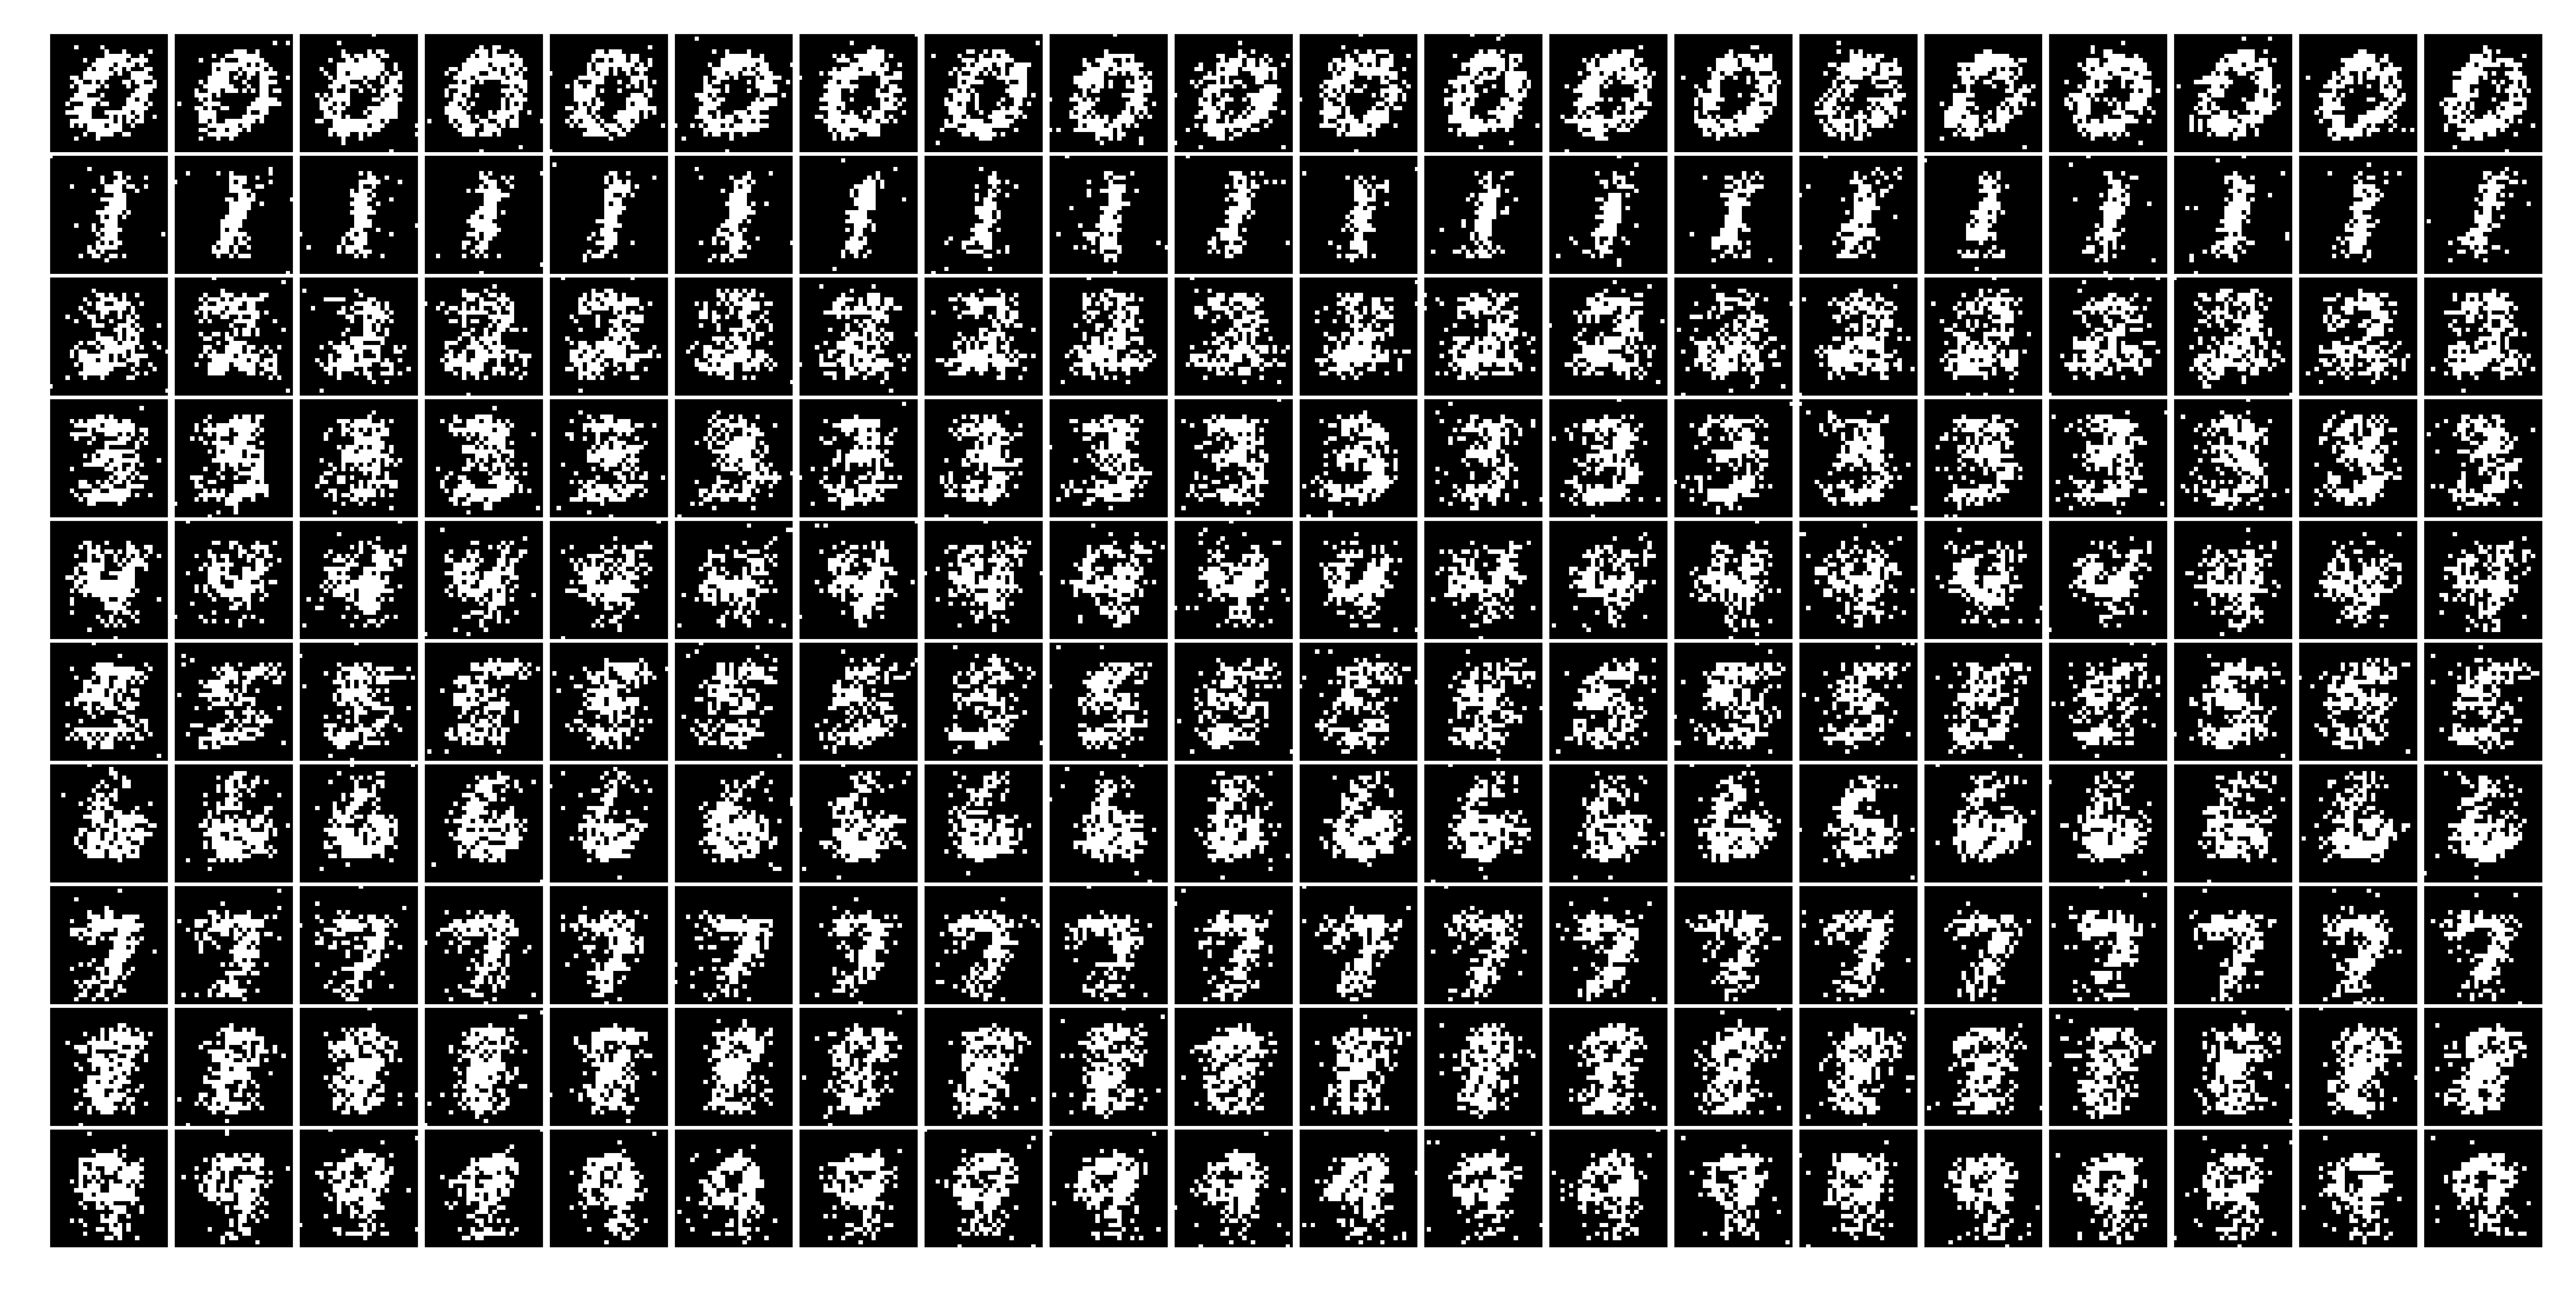

In [164]:
def P10(num_examples):

### STUDENT START ###
    # Create a Bernoulli Naive Bayes model, train on the mini train set, and get the posterior probabilities
    model = BernoulliNB()
    model.fit(mini_train_data, mini_train_labels)
    probabilities = np.exp(model.feature_log_prob_)
    
    # Creating a new figure
    plt.figure(figsize=(10,5), dpi=X.shape[1])
    
    # Loop through the length of the unique labels
    for digit in range(len(np.unique(mini_train_labels))):
        # Loop 'num_example' times to plot 'num_example' images
        for each_example in range(num_examples):
            # Compare estimated probabilities of pixels with randomly generated numbers
            example_digit = np.where(probabilities[digit] > np.random.rand(mini_train_data.shape[1]), 1, 0)
            
            # Calculating index for a position starting with 1 at top-left
            # "(digit * num_examples)" gets index of previous subplot before new digit
            # "+ each_example + 1" -> adding value of which number example we are on + 1 since it is 1-indexed
            index = digit * num_examples + each_example + 1
            plt.subplot(len(np.unique(mini_train_labels)), num_examples, index)
            plt.subplots_adjust(wspace=0, hspace=0)
            
            # Reshape the example digit to a 28 x 28 matrix
            d = example_digit.reshape((28, 28))
        
            # Hiding axes
            current_axes = plt.gca() 
            current_axes.get_xaxis().set_ticks([])
            current_axes.get_yaxis().set_ticks([])
            current_axes.spines['bottom'].set_color('white')
            current_axes.spines['top'].set_color('white') 
            current_axes.spines['right'].set_color('white')
            current_axes.spines['left'].set_color('white')
            
            # Plot the digit example
            plt.imshow(d)

### STUDENT END ###

P10(20)

ANSWER: In comparison to the training digit images, the generated digit images look hazier; however, they still manage to adhere to a somewhat digit-like form for each digit even though there is clear evidence of noise (white spots on the edges and outskirts of each plot).

### Part 11:

Recall that a strongly calibrated classifier is rougly 90% accurate when the posterior probability of the predicted class is 0.9. A weakly calibrated classifier is more accurate when the posterior probability of the predicted class is 90% than when it is 80%. A poorly calibrated classifier has no positive correlation between posterior probability and accuracy.  

Produce a Bernoulli Naive Bayes model.  Evaluate performance: partition the dev set into several buckets based on the posterior probabilities of the predicted classes - think of a bin in a histogram- and then estimate the accuracy for each bucket. So, for each prediction, find the bucket to which the maximum posterior probability belongs, and update "correct" and "total" counters accordingly.  Show the accuracy for each bucket.

Notes:
* Set LaPlace smoothing (alpha) to the optimal value (from part 8).
* Set binarization threshold to 0.
* Train on the mini train set.
* Evaluate perfromance on the dev set.

How would you characterize the calibration for this Bernoulli Naive Bayes model?

In [172]:
def P11(buckets, correct, total):
    
### STUDENT START ###
    # Create a Bernoulli Naive Bayes model with optimal smoothing alpha value from part 8
    bernoulli_model = BernoulliNB(alpha=0.001)
    # Train the model on the mini train set
    bernoulli_model.fit(mini_train_data, mini_train_labels)
    
    # Get all of the predicted posterior probabilities
    posterior_predictions = bernoulli_model.predict_proba(dev_data)
    
    # Loop through each row of posterior probability predictions
    for row in range(len(posterior_predictions)):
        # Find the index of the max posterior probability and get its value
        max_posterior_index = np.argmax(posterior_predictions[row])
        max_posterior_prob = posterior_predictions[row][max_posterior_index]
        
        # Copy the buckets list
        bins = buckets
        bin_index = 0
        
        # Get the bucket index (Either check if value is already in bin OR add to bins, sort, and then find the index)
        if max_posterior_prob in bins:
            bin_index = bins.index(max_posterior_prob)
        else:
            bins.append(max_posterior_prob)
            bins.sort()
            bin_index = bins.index(max_posterior_prob)
            bins.remove(max_posterior_prob)
            
        # Check if the max posterior probability predicts the correct label
        if max_posterior_index == int(dev_labels[row]):
            correct[bin_index] += 1
        
        total[bin_index] += 1
### STUDENT END ###

buckets = [0.5, 0.9, 0.999, 0.99999, 0.9999999, 0.999999999, 0.99999999999, 0.9999999999999, 1.0]
correct = [0 for i in buckets]
total = [0 for i in buckets]

P11(buckets, correct, total)

for i in range(len(buckets)):
    accuracy = 0.0
    if (total[i] > 0): accuracy = correct[i] / total[i]
    print('p(pred) is %.13f to %.13f    total = %3d    accuracy = %.3f' % (0 if i==0 else buckets[i-1], buckets[i], total[i], accuracy))

p(pred) is 0.0000000000000 to 0.5000000000000    total =   0    accuracy = 0.000
p(pred) is 0.5000000000000 to 0.9000000000000    total =  31    accuracy = 0.355
p(pred) is 0.9000000000000 to 0.9990000000000    total =  67    accuracy = 0.433
p(pred) is 0.9990000000000 to 0.9999900000000    total =  59    accuracy = 0.458
p(pred) is 0.9999900000000 to 0.9999999000000    total =  46    accuracy = 0.652
p(pred) is 0.9999999000000 to 0.9999999990000    total =  62    accuracy = 0.774
p(pred) is 0.9999999990000 to 0.9999999999900    total =  33    accuracy = 0.788
p(pred) is 0.9999999999900 to 0.9999999999999    total =  43    accuracy = 0.791
p(pred) is 0.9999999999999 to 1.0000000000000    total = 659    accuracy = 0.938


ANSWER: A strongly calibrated classifier indicates that the average accuracy of each bin would be approximately equal to the median of the prediction bin. However, a weakly calibrated classifier would simply depict average accuracies increasing with each bin. In our case, it appears that the results indicate a weakly calibrated classifier as the average accuracies just appear to increase from bin to bin.

### Part 12 EXTRA CREDIT:

Design new features to see if you can produce a Bernoulli Naive Bayes model with better performance.  Show the accuracy of a model based on the original features and the accuracy of the model based on the new features.

Here are a few ideas to get you started:
- Try summing or averaging the pixel values in each row.
- Try summing or averaging the pixel values in each column.
- Try summing or averaging the pixel values in each square block. (pick various block sizes)
- Try counting the number of enclosed regions. (8 usually has 2 enclosed regions, 9 usually has 1, and 7 usually has 0)

Notes:
* Train on the mini train set (enhanced to comprise the new features).
* Evaulate performance on the dev set.
* Ensure that your code is well commented.

In [0]:
#def P12():

### STUDENT START ###


### STUDENT END ###

#P12()